In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures



from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings(action='ignore')


In [7]:
data = pd.read_csv('thermohilic_2.csv')


In [8]:
data

,Unnamed: 0,Time,Daily biogas production,Acetate,Propionate,Butyrate
0,NaN,0.0,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN,NaN,NaN
2,NaN,2.0,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,NaN,NaN,NaN
4,NaN,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
274,NaN,274.0,4.17,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN
276,NaN,NaN,NaN,NaN,NaN,NaN
277,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data=data.fillna(0)

In [10]:
data['Daily biogas production'] = data['Daily biogas production'].astype(int)


In [11]:
data = data.drop('Unnamed: 0', axis=1)


In [12]:
data

,Time,Daily biogas production,Acetate,Propionate,Butyrate
0,0.0,0,0.0,0.0,0.0
1,1.0,0,0.0,0.0,0.0
2,2.0,0,0.0,0.0,0.0
3,3.0,0,0.0,0.0,0.0
4,4.0,0,0.0,0.0,0.0
...,...,...,...,...,...
274,274.0,4,0.0,0.0,0.0
275,0.0,0,0.0,0.0,0.0
276,0.0,0,0.0,0.0,0.0
277,0.0,0,0.0,0.0,0.0


In [13]:
data.drop([275,276,277,278], axis=0, inplace=True)


In [14]:
def preprocess_inputs(df):
    df = df.copy()
    
  
    # Split df into X and y
    y = df['Daily biogas production']
    X = df.drop('Daily biogas production', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9,  random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [16]:
original_models = {
    "                         Decision Tree : ":DecisionTreeClassifier(),
    "                         k-means       : ":KNeighborsClassifier(),
    "                         ANN           : ":MLPClassifier(),
    "                         SVC           : ":SVC(),
    "                         Random        : ":RandomForestClassifier(),
    "                         Gradient      : " :GradientBoostingClassifier()




}

for name, model in original_models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                         Decision Tree :  trained.
                         k-means       :  trained.
                         ANN           :  trained.
                         SVC           :  trained.
                         Random        :  trained.
                         Gradient      :  trained.


In [17]:
original_results = []

for name, model in original_models.items():
    result = model.score(X_test, y_test)
    original_results.append(result)
    print(name + ": {:.2f}%".format(result * 100))

                         Decision Tree : : 85.71%
                         k-means       : : 78.57%
                         ANN           : : 53.57%
                         SVC           : : 50.00%
                         Random        : : 85.71%
                         Gradient      : : 85.71%


Polynominal Fit

In [116]:
X = data.iloc[:,:1].values
y = data.iloc[:,1].values
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)
poly.fit(X_poly,y)
lin_reg =LinearRegression()
lin_reg.fit(X_poly,y)



LinearRegression()

In [117]:
print(X_poly.shape)
print(X.shape)
print(y.shape)

(275, 7)
(275, 1)
(275,)


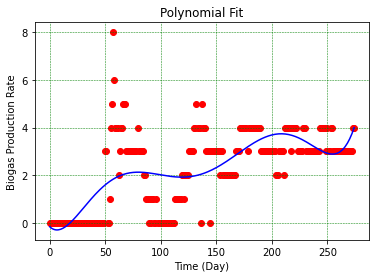

In [118]:
plt.title("Polynomial Fit",)
plt.xlabel("Time (Day)")
plt.ylabel("Biogas Production Rate")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.scatter(X,y ,color='red')
plt.plot(X,lin_reg.predict(X_poly),color='blue')


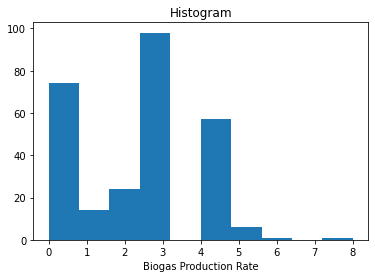

In [119]:
plt.title("Histogram",)
plt.xlabel("Biogas Production Rate")
plt.hist(y)
plt.show() 